In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import os.path as op

In [3]:
from AFQ import api

/Users/arokem/.virtualenvs/afq/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
import AFQ.data as afd
import AFQ.viz as afv

In [5]:
afd.organize_stanford_data()

Dataset is already in place. If you want to fetch it again please first remove the folder /Users/arokem/.dipy/stanford_hardi 


In [6]:
base_dir = op.join(op.expanduser('~'), 'AFQ_data', 'stanford_hardi')

In [7]:
op.join(afd.afq_home, 'stanford_hard')

'/Users/arokem/AFQ_data/stanford_hard'

In [8]:
myafq = api.AFQ(preproc_path=op.join(afd.afq_home, 'stanford_hardi'), sub_prefix='sub',
               wm_labels=[1, 2])

In [9]:
myafq.data_frame

,anat_file,bval_file,bvec_file,dwi_file,seg_file,sess,subject,gtab,dwi_affine
0,/Users/arokem/AFQ_data/stanford_hardi/sub-01/s...,/Users/arokem/AFQ_data/stanford_hardi/sub-01/s...,/Users/arokem/AFQ_data/stanford_hardi/sub-01/s...,/Users/arokem/AFQ_data/stanford_hardi/sub-01/s...,/Users/arokem/AFQ_data/stanford_hardi/sub-01/s...,/Users/arokem/AFQ_data/stanford_hardi/sub-01/s...,sub-01,<dipy.core.gradients.GradientTable object at 0...,"[[2.0, 0.0, 0.0, -80.0], [0.0, 2.0, 0.0, -120...."


In [10]:
myafq.brain_mask

0    /Users/arokem/AFQ_data/stanford_hardi/sub-01/s...
Name: brain_mask_file, dtype: object

In [11]:
import nibabel as nib

In [12]:
dti_img = nib.load(myafq.dti[0])
dti_data = dti_img.get_data()

In [13]:
myafq['gtab']

0    <dipy.core.gradients.GradientTable object at 0...
Name: gtab, dtype: object

/Users/arokem/.virtualenvs/afq/lib/python3.6/site-packages/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \


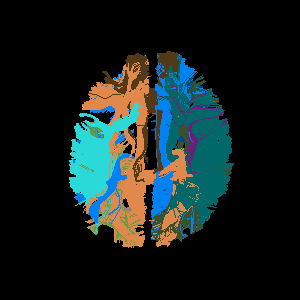

In [40]:
ren = afv.visualize_bundles(myafq.clean_bundles[0], interact=True)

In [15]:
debug

ERROR:root:No traceback has been produced, nothing to debug.


In [16]:
import pandas as pd

In [17]:
df = pd.read_csv(myafq.tract_profiles[0])

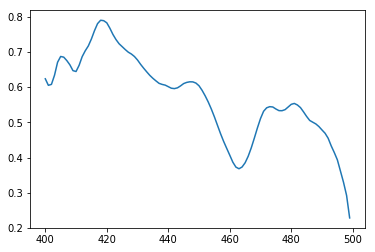

In [36]:
plt.plot(df[(df['scalar'] == "dti_fa") & (df['bundle']=="CST_R")]['profiles'])

In [39]:
myafq.clean_bundles[0]

'/Users/arokem/AFQ_data/stanford_hardi/sub-01/sess-01/dwi/sub-01_sess-01_dwiDTI_det_bundles.trk'

In [20]:
nib.load(myafq.data_frame.dwi_file[0]).shape

(81, 106, 76, 160)

In [21]:
    dwi_shape = nib.load(myafq.data_frame.dwi_file[0]).shape
    brain_mask = np.zeros(dwi_shape[:-1])


In [22]:
brain_mask.shape

(81, 106, 76)

In [23]:
vol = np.zeros(brain_mask.shape)

In [24]:
tgram = nib.streamlines.load(myafq.bundles[0])

In [25]:
uids = np.array(tgram.tractogram.data_per_streamline['bundle'])

In [26]:
bundle_dict = api.make_bundle_dict()

Dataset is already in place. If you want to fetch it again please first remove the folder /Users/arokem/AFQ_data/templates 


In [27]:
bundle_dict['CST_L']['uid']

6

In [28]:
bundle_dict['CST_R']['uid']

5

In [29]:
myafq.dwi_affine[0]

array([[   2.,    0.,    0.,  -80.],
       [   0.,    2.,    0., -120.],
       [   0.,    0.,    2.,  -60.],
       [   0.,    0.,    0.,    1.]])